In [61]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib
matplotlib.rcParams["figure.figsize"]= (20,10)
import seaborn as sns 
from sklearn.metrics import accuracy_score
#from sklearn.metrics import accuracy_score

In [62]:
mack = pd.read_csv('Taxi_train.csv')
mack.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


Dataset :
⏱️ 'trip_duration': How long did the journey last?[in Seconds]

🛣️ 'distance_traveled': How far did the taxi travel?[in Km]

🧑‍🤝‍🧑 'num_of_passengers': How many passengers were in the taxi?

💵 'fare': What's the base fare for the journey?[In INR]

💲 'tip': How much did the driver receive in tips?[In INR]

🎀 'miscellaneous_fees': Were there any additional charges during the trip?e.g. tolls, convenience fees, GST
etc.[In INR]

💰 'total_fare': The grand total for the ride (this is your prediction target!).[In INR]

⚡ 'surge_applied': Was there a surge pricing applied? Yes or no?

In [63]:
mack.shape

(209673, 8)

In [64]:
mack.dtypes

trip_duration         float64
distance_traveled     float64
num_of_passengers     float64
fare                  float64
tip                     int64
miscellaneous_fees    float64
total_fare            float64
surge_applied           int64
dtype: object

In [65]:
mack.isnull().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

In [66]:
mack['num_of_passengers'].unique()

array([1., 3., 2., 0., 6., 5., 4., 8., 7., 9.])

In [67]:
mack[mack['miscellaneous_fees']< 0]

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
22479,345.0,1.45,1.0,75.0,19,-0.250,93.750,0
23194,749.0,7.40,1.0,135.0,19,-0.250,153.750,0
27452,1003.0,9.50,1.0,187.5,38,-0.500,225.000,0
30167,359.0,2.09,1.0,112.5,8,-0.500,120.000,0
35891,1455.0,11.10,1.0,375.0,94,-0.250,468.750,0
44835,58.0,2.25,1.0,75.0,19,-0.250,93.750,0
66388,976.0,7.24,2.0,157.5,32,-0.500,189.000,0
78548,639.0,1.45,1.0,90.0,8,-0.500,97.500,0
83042,441.0,1.77,2.0,90.0,27,-0.375,116.625,0
88830,427.0,1.93,1.0,75.0,19,-0.250,93.750,0


In [68]:
mack[mack['num_of_passengers'] == 0]

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
14,234.0,1.61,0.0,37.50,0,26.625,64.125,1
380,584.0,1.93,0.0,60.00,0,34.125,94.125,1
426,1548.0,4.02,0.0,123.75,0,26.625,150.375,1
459,471.0,2.90,0.0,60.00,21,9.375,90.375,0
1523,436.0,2.09,0.0,52.50,15,5.625,73.125,0
...,...,...,...,...,...,...,...,...
208592,1148.0,4.67,0.0,108.75,27,26.625,162.375,1
208679,240.0,0.97,0.0,33.75,8,33.625,75.375,1
208707,2443.0,6.92,0.0,0.00,0,0.000,0.000,0
208909,656.0,2.74,0.0,67.50,15,5.625,88.125,0


In [69]:
mack[mack['num_of_passengers'] > 6]

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
6431,350.0,0.02,8.0,60.000,0,2.250,62.25,0
12541,650.0,2.62,8.0,60.000,0,2.250,62.25,0
17462,1196.0,17.33,7.0,562.500,127,71.900,761.40,1
26982,64.0,0.18,8.0,6.000,0,2.250,8.25,0
29503,3657.0,38.29,9.0,713.175,0,90.375,803.55,0
29959,1023.0,3.96,8.0,60.000,0,2.250,62.25,0
36010,329.0,1.42,8.0,60.000,0,2.250,62.25,0
50970,521.0,2.30,9.0,67.500,0,2.250,69.75,0
52571,1053.0,5.02,8.0,60.000,0,2.250,62.25,0
54190,672.0,3.48,8.0,60.000,0,2.250,62.25,0


From above we can deduce:
 0 and above 6 no. of passengers are doubtful

In [70]:
mack_2= mack.copy()
mack_2['price_per _km'] = (mack['fare'] + mack['miscellaneous_fees'])/ mack['distance_traveled']
mack_2.sample(10)

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied,price_per _km
758,1015.0,4.83,1.0,97.50,0,6.000,103.500,0,21.428571
120358,228.0,1.03,1.0,33.75,38,13.000,84.750,0,45.388350
31513,242.0,1.13,1.0,33.75,12,5.625,51.375,0,34.845133
103590,3055.0,23.40,1.0,363.75,88,75.650,527.400,1,18.777778
193112,786.0,3.86,1.0,82.50,27,26.925,136.425,1,28.348446
12863,514.0,3.69,1.0,71.25,0,9.750,81.000,0,21.951220
25350,3413.0,15.80,1.0,303.75,68,33.700,405.450,1,21.357595
141565,669.0,3.17,1.0,71.25,15,6.450,92.700,0,24.511041
127878,282.0,2.24,1.0,48.75,0,13.500,62.250,0,27.790179
110239,240.0,2.69,1.0,52.50,0,6.000,58.500,0,21.747212


In [71]:
mack_2['price_per _km'].describe()

count    209673.000000
mean         54.541920
std         564.544906
min          -3.125000
25%          22.428717
50%          27.725118
75%          34.453125
max      100075.000000
Name: price_per _km, dtype: float64

In [72]:
mack_2[mack_2['price_per _km']<0]

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied,price_per _km
176496,27.0,0.16,1.0,0.0,338,-0.5,337.5,0,-3.125


In [73]:
mack_2[mack_2['price_per _km']>100]

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied,price_per _km
36,11323.0,0.14,1.0,337.50,68,2.20,407.70,0,2426.428571
85,10.0,0.31,1.0,75.00,0,2.25,77.25,0,249.193548
244,5.0,0.02,1.0,18.75,0,6.00,24.75,0,1237.500000
250,11.0,0.02,1.0,18.75,22,14.00,54.75,0,1637.500000
264,45.0,0.16,1.0,18.75,0,6.00,24.75,0,154.687500
...,...,...,...,...,...,...,...,...,...
209471,69.0,0.14,1.0,22.50,0,6.00,28.50,0,203.571429
209508,2.0,0.03,3.0,52.50,0,2.25,54.75,0,1825.000000
209609,2.0,0.02,1.0,135.00,27,2.70,164.70,0,6885.000000
209646,3.0,0.35,1.0,150.00,0,2.25,152.25,0,435.000000


* The negative values and the price per km above 40 also seems to be outliers 

In [74]:
mack_2[mack_2['distance_traveled'] > 110]

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied,price_per _km
34734,13755.0,315.25,1.0,3802.500,0,55.125,3857.625,0,12.236717
62108,8231.0,169.90,1.0,3963.750,0,6.000,3969.750,0,23.365215
72233,4956.0,113.38,1.0,2595.000,0,6.000,2601.000,0,22.940554
73922,6507.0,115.73,1.0,1125.000,379,139.850,1643.850,0,10.929318
78367,17042.0,215.31,1.0,2823.750,0,280.500,3104.250,0,14.417584
83097,486.0,1136.50,1.0,61.950,0,2.250,64.200,0,0.056489
89007,21499.0,131.89,1.0,60.000,0,2.250,62.250,0,0.471984
132372,10936.0,188.29,1.0,2332.500,0,55.125,2387.625,0,12.680573
185722,5898.0,130.87,1.0,1500.000,0,51.375,1551.375,0,11.854321
197339,1734.0,57283.91,1.0,187.125,20,50.875,258.000,0,0.004155


Its surprising to get travelled distance more than 110 km in a city. So above it,we will consider them as outliers. 

In [75]:
mack_2['duration_in_min'] = mack['trip_duration'] / 60
mack_2.sample(10)

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied,price_per _km,duration_in_min
180510,610.0,1.74,1.0,60.00,15,13.200,88.200,0,42.068966,10.166667
115670,163.0,0.76,1.0,30.00,11,13.375,54.375,0,57.072368,2.716667
87529,668.0,2.80,2.0,67.50,0,6.000,73.500,0,26.250000,11.133333
107543,693.0,3.01,1.0,71.25,24,10.050,105.300,0,27.009967,11.550000
56,626.0,2.57,2.0,67.50,19,26.375,112.875,1,36.527237,10.433333
48479,414.0,2.32,1.0,52.50,7,13.100,72.600,0,28.275862,6.900000
27273,1043.0,2.57,1.0,90.00,0,26.625,116.625,1,45.379377,17.383333
99129,284.0,0.87,2.0,37.50,0,9.750,47.250,0,54.310345,4.733333
144625,595.0,1.30,2.0,56.25,0,13.500,69.750,0,53.653846,9.916667
37596,364.0,2.00,3.0,45.00,12,13.200,70.200,0,29.100000,6.066667


In [76]:
mack_2[mack_2['distance_traveled'] < 0.2 ]

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied,price_per _km,duration_in_min
36,11323.0,0.14,1.0,337.50,68,2.20,407.70,0,2426.428571,188.716667
244,5.0,0.02,1.0,18.75,0,6.00,24.75,0,1237.500000,0.083333
250,11.0,0.02,1.0,18.75,22,14.00,54.75,0,1637.500000,0.183333
264,45.0,0.16,1.0,18.75,0,6.00,24.75,0,154.687500,0.750000
546,21.0,0.16,1.0,18.75,0,6.00,24.75,0,154.687500,0.350000
...,...,...,...,...,...,...,...,...,...,...
209276,16.0,0.02,6.0,18.75,0,6.00,24.75,0,1237.500000,0.266667
209446,12.0,0.11,1.0,585.00,0,2.25,587.25,0,5338.636364,0.200000
209471,69.0,0.14,1.0,22.50,0,6.00,28.50,0,203.571429,1.150000
209508,2.0,0.03,3.0,52.50,0,2.25,54.75,0,1825.000000,0.033333


In [77]:
mack_2[ (mack_2['distance_traveled'] < 0.5) & (mack_2['fare'] > 200) ]

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied,price_per _km,duration_in_min
36,11323.0,0.14,1.0,337.5,68,2.200,407.700,0,2426.428571,188.716667
1511,7.0,0.03,1.0,225.0,0,2.250,227.250,0,7575.000000,0.116667
2095,5.0,0.05,1.0,375.0,94,2.600,471.600,0,7552.000000,0.083333
2647,11.0,0.37,2.0,450.0,90,2.700,542.700,0,1223.513514,0.183333
3102,4.0,0.21,1.0,300.0,41,2.650,343.650,0,1441.190476,0.066667
...,...,...,...,...,...,...,...,...,...,...
207528,4791.0,0.19,5.0,315.0,0,6.000,321.000,0,1689.473684,79.850000
207543,3.0,0.23,1.0,375.0,113,2.425,490.425,0,1640.978261,0.050000
208138,31.0,0.24,1.0,450.0,0,2.250,452.250,0,1884.375000,0.516667
209234,4574.0,0.05,1.0,300.0,0,6.000,306.000,0,6120.000000,76.233333


In [78]:
mack_2[mack_2['fare'] < 20]

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied,price_per _km,duration_in_min
244,5.0,0.02,1.0,18.75,0,6.0,24.75,0,1237.500000,0.083333
250,11.0,0.02,1.0,18.75,22,14.0,54.75,0,1637.500000,0.183333
264,45.0,0.16,1.0,18.75,0,6.0,24.75,0,154.687500,0.750000
546,21.0,0.16,1.0,18.75,0,6.0,24.75,0,154.687500,0.350000
778,2.0,2.90,1.0,18.75,0,6.0,24.75,0,8.534483,0.033333
...,...,...,...,...,...,...,...,...,...,...
208797,45.0,0.21,1.0,18.75,0,6.0,24.75,0,117.857143,0.750000
208802,108.0,0.02,6.0,18.75,0,6.0,24.75,0,1237.500000,1.800000
208873,18.0,0.05,1.0,18.75,0,6.0,24.75,0,495.000000,0.300000
209126,39.0,0.11,1.0,18.75,0,6.0,24.75,0,225.000000,0.650000


In [79]:
mack_2.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied,price_per _km,duration_in_min
count,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000
mean,1173.181478,5.054431,1.292808,99.623431,13.030824,15.136829,127.791084,0.280523,54.541920,19.553025
std,4775.653621,125.217419,0.930754,85.602702,20.367764,12.553436,98.797374,0.449256,564.544906,79.594227
min,0.000000,0.020000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000,-3.125000,0.000000
25%,446.000000,1.950000,1.000000,52.500000,0.000000,6.000000,70.200000,0.000000,22.428717,7.433333
50%,707.000000,3.200000,1.000000,75.000000,9.000000,9.750000,101.700000,0.000000,27.725118,11.783333
75%,1098.000000,5.730000,1.000000,116.250000,20.000000,26.450000,152.250000,1.000000,34.453125,18.300000
max,86387.000000,57283.910000,9.000000,4466.250000,2500.000000,435.000000,4472.250000,1.000000,100075.000000,1439.783333


### From above we can generate these insights:
  1. In num_of_passengers, 0 and above above 6 values are doubtful.
  2. In distance_traveled, rows with above 110 values are doubtful. As it is not possible to travel that much in a city at once.
  3. In fare and total_fare, rows with 0 values should be eliminated.
  4. In miscellaneous_fees, values which are negative should be eliminated.
  5. In trip_duration, any passenger would take taxi for atleast 1 mins below it doesn't make sense.
  


## Removing Outliers, according to the insights generated!!

In [80]:
mack_2.shape

(209673, 10)

In [81]:
indexAge = mack_2[ (mack_2['num_of_passengers'] == 0) | (mack_2['num_of_passengers'] > 6) ].index
mack_2.drop(indexAge , inplace=True)
mack_2.shape

(208885, 10)

In [82]:
indexAge_2 = mack_2[ (mack_2['fare'] == 0) | (mack_2['trip_duration'] < 60) ].index
mack_2.drop(indexAge_2 , inplace=True)
mack_2.shape

(206151, 10)

In [83]:
indexAge_3 = mack_2[ (mack_2['distance_traveled'] > 110) | (mack_2['distance_traveled'] < 0.1) ].index
mack_2.drop(indexAge_3 , inplace=True)
mack_2.shape

(205891, 10)

In [84]:
indexAge_4 = mack_2[ (mack_2['distance_traveled'] < 0.5) & (mack_2['fare'] > 200) ].index
mack_2.drop(indexAge_4 , inplace=True)
mack_2.shape

(205826, 10)

In [85]:
indexAge_5 = mack_2[(mack_2['fare'] < 20) ].index
mack_2.drop(indexAge_5 , inplace=True)
mack_2.shape

(205789, 10)

In [86]:
mack_3 = mack_2.drop(['price_per _km', 'duration_in_min'], axis=1)
mack_3.sample(10)

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
100966,428.0,1.46,1.0,48.75,15,26.700,90.450,1
98198,433.0,2.30,1.0,52.50,8,13.000,73.500,0
98807,907.0,5.65,1.0,108.75,36,9.300,154.050,0
76472,630.0,2.56,1.0,63.75,0,13.500,77.250,0
156331,710.0,2.83,1.0,71.25,0,13.500,84.750,0
973,960.0,12.47,1.0,172.50,0,55.125,227.625,0
154101,615.0,1.21,1.0,56.25,0,6.000,62.250,0
34935,442.0,2.19,1.0,52.50,16,9.350,77.850,0
120810,3811.0,7.90,1.0,281.25,0,6.000,287.250,0
163326,838.0,4.46,2.0,86.25,23,26.200,135.450,1


In [87]:
mack_3.shape

(205789, 8)

In [88]:
mack_3.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,205789.000000,205789.000000,205789.000000,205789.000000,205789.000000,205789.000000,205789.000000,205789.000000
mean,1186.578714,4.825027,1.296610,99.365674,13.033131,15.268374,127.667179,0.284262
std,4801.889811,4.913974,0.926745,81.368780,19.756627,12.546161,94.972503,0.451063
min,60.000000,0.100000,1.000000,22.500000,0.000000,-0.500000,24.750000,0.000000
25%,456.000000,2.000000,1.000000,52.500000,0.000000,6.000000,70.200000,0.000000
50%,714.000000,3.230000,1.000000,75.000000,9.000000,9.750000,101.700000,0.000000
75%,1105.000000,5.790000,1.000000,116.250000,20.000000,26.500000,152.250000,1.000000
max,86387.000000,109.770000,6.000000,4466.250000,2500.000000,435.000000,4472.250000,1.000000


Text(0, 0.5, 'Count')

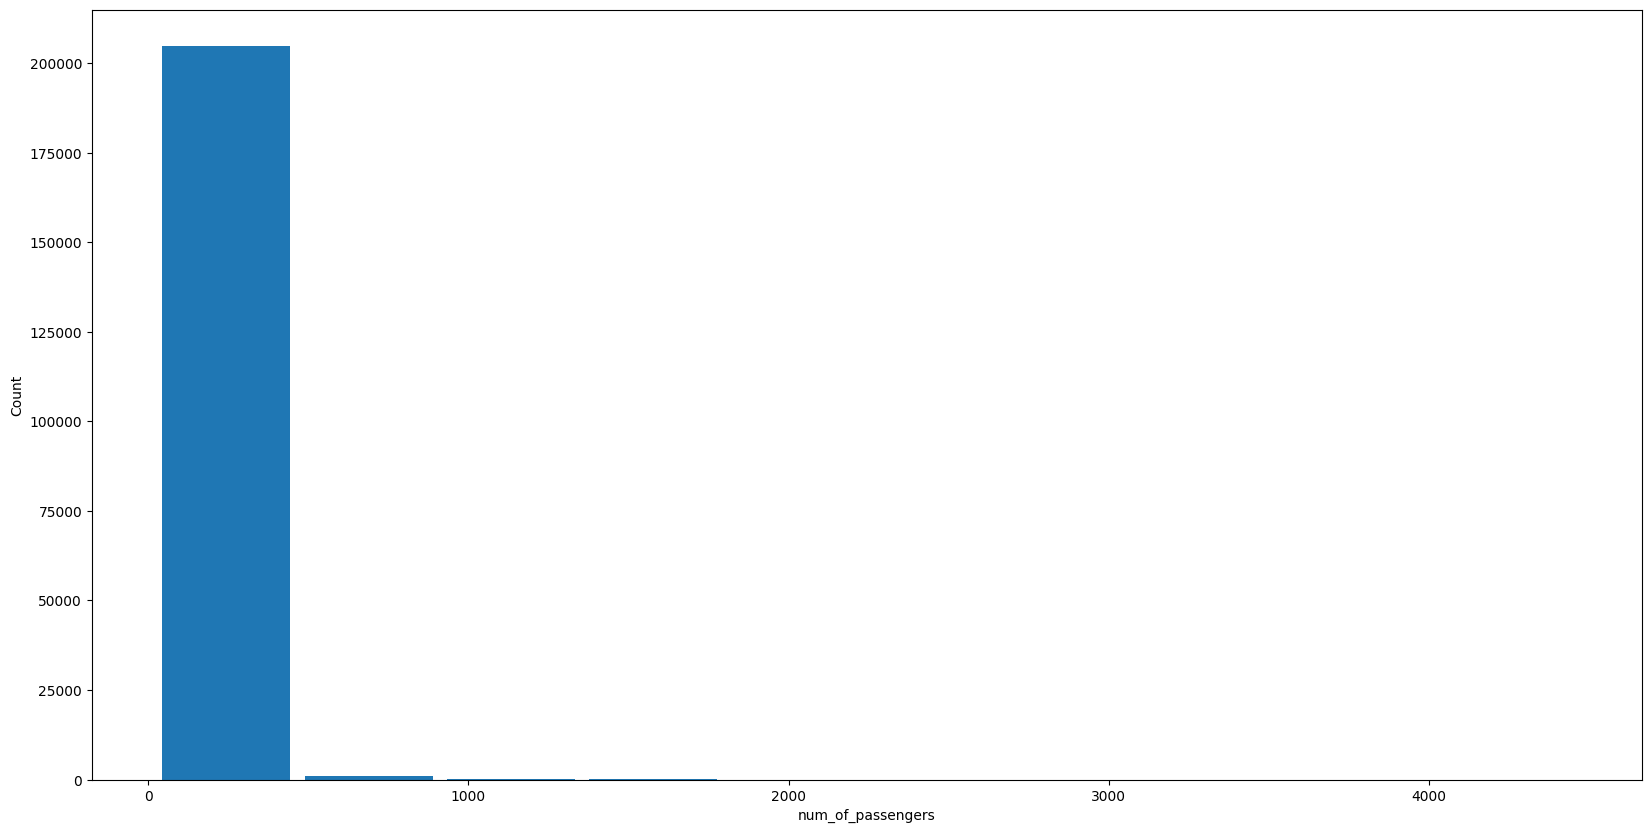

In [89]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(mack_3.fare, rwidth = 0.9)
plt.xlabel('num_of_passengers')
plt.ylabel('Count')

In [90]:
mack_3.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,205789.000000,205789.000000,205789.000000,205789.000000,205789.000000,205789.000000,205789.000000,205789.000000
mean,1186.578714,4.825027,1.296610,99.365674,13.033131,15.268374,127.667179,0.284262
std,4801.889811,4.913974,0.926745,81.368780,19.756627,12.546161,94.972503,0.451063
min,60.000000,0.100000,1.000000,22.500000,0.000000,-0.500000,24.750000,0.000000
25%,456.000000,2.000000,1.000000,52.500000,0.000000,6.000000,70.200000,0.000000
50%,714.000000,3.230000,1.000000,75.000000,9.000000,9.750000,101.700000,0.000000
75%,1105.000000,5.790000,1.000000,116.250000,20.000000,26.500000,152.250000,1.000000
max,86387.000000,109.770000,6.000000,4466.250000,2500.000000,435.000000,4472.250000,1.000000


## Model Building and prediction 

In [91]:
mack_4 = mack_3.drop(['fare','tip','miscellaneous_fees','surge_applied'], axis='columns' )
mack_4.head()

,trip_duration,distance_traveled,num_of_passengers,total_fare
0,748.0,2.75,1.0,105.300
1,1187.0,3.43,1.0,142.200
2,730.0,3.12,1.0,97.875
3,671.0,5.63,3.0,99.750
4,329.0,2.09,1.0,70.200


In [92]:
X = mack_4.drop('total_fare', axis = 'columns')
X.head()

,trip_duration,distance_traveled,num_of_passengers
0,748.0,2.75,1.0
1,1187.0,3.43,1.0
2,730.0,3.12,1.0
3,671.0,5.63,3.0
4,329.0,2.09,1.0


In [93]:
y = mack_4['total_fare']
y.head()

0    105.300
1    142.200
2     97.875
3     99.750
4     70.200
Name: total_fare, dtype: float64

In [94]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size = 0.2, random_state = 10)

In [95]:
from sklearn.linear_model import LinearRegression
model_1 = LinearRegression()
model_1.fit(X_train, y_train)
model_1.score(X_test,y_test)

0.8001099072483999

In [96]:
X.columns

Index(['trip_duration', 'distance_traveled', 'num_of_passengers'], dtype='object')

In [97]:
def predict_price(time_in_sec, distance, no_of_passengers):
    
    
    x = np.zeros(len(X.columns))
    x[0] = time_in_sec
    x[1] = distance
    x[2] = no_of_passengers
    
    
    return model_1.predict([x])[0]

In [98]:
predict_price(2000, 60, 4)

C:\Users\User1\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


1058.2949883028277

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(mack_4)
print(scaled)

In [99]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler 

import plotly.graph_objects as go 
import plotly.express as px

In [100]:
mack_5 = mack_3.drop(['fare','tip','miscellaneous_fees','surge_applied'], axis='columns' )
mack_5

,trip_duration,distance_traveled,num_of_passengers,total_fare
0,748.0,2.75,1.0,105.300
1,1187.0,3.43,1.0,142.200
2,730.0,3.12,1.0,97.875
3,671.0,5.63,3.0,99.750
4,329.0,2.09,1.0,70.200
...,...,...,...,...
209668,1617.0,8.42,1.0,202.800
209669,438.0,1.29,1.0,95.325
209670,571.0,2.82,1.0,69.750
209671,491.0,2.16,1.0,69.750


In [101]:
X_1 = mack_5['distance_traveled']
y_1 = mack_5['total_fare']

In [102]:
from sklearn.model_selection import train_test_split 
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1,y_1 ,test_size = 0.2, random_state = 10)

In [103]:
X_1_train = mack_5['distance_traveled'].values.reshape(-1,1)
print(X_1_train)

[[ 2.75]
 [ 3.43]
 [ 3.12]
 ...
 [ 2.82]
 [ 2.16]
 [33.72]]


In [104]:
y_1_train = mack_5['total_fare'].values.reshape(-1,1)
print(y_1_train)

[[105.3  ]
 [142.2  ]
 [ 97.875]
 ...
 [ 69.75 ]
 [ 69.75 ]
 [339.75 ]]


In [105]:
X_1_test = mack_5['distance_traveled'].values.reshape(-1,1)
print(X_1_test)

y_1_test = mack_5['total_fare'].values.reshape(-1,1)
print(y_1_test)

[[ 2.75]
 [ 3.43]
 [ 3.12]
 ...
 [ 2.82]
 [ 2.16]
 [33.72]]
[[105.3  ]
 [142.2  ]
 [ 97.875]
 ...
 [ 69.75 ]
 [ 69.75 ]
 [339.75 ]]


In [106]:
X_1_train_scaler = MinMaxScaler()
y_1_train_scaler = MinMaxScaler()

X_1_train_scaled = X_1_train_scaler.fit_transform(X_1_train)
y_1_train_scaled = y_1_train_scaler.fit_transform(y_1_train)

print('X_1:',X_1_train_scaled)
print('y_1:',y_1_train_scaled)

X_1: [[0.0241634 ]
 [0.03036382]
 [0.02753716]
 ...
 [0.02480168]
 [0.01878362]
 [0.30655603]]
y_1: [[0.0181113 ]
 [0.02640809]
 [0.01644182]
 ...
 [0.01011804]
 [0.01011804]
 [0.07082631]]


model_2 = SVR(kernel='rbf', C=1 , epsilon = 10)
model_2.fit(X_train,y_train)
pred_2 = model_2.predict(X_test)
accuracy_2= accuracy_score(y_test, pred_2)
print(accuracy_2)

In [107]:
X_1_test_scaler = MinMaxScaler()
y_1_test_scaler = MinMaxScaler()

X_1_test_scaled = X_1_test_scaler.fit_transform(X_1_test)
y_1_test_scaled = y_1_test_scaler.fit_transform(y_1_test)

print('X_1:',X_1_test_scaled)
print('y_1:',y_1_test_scaled)

X_1: [[0.0241634 ]
 [0.03036382]
 [0.02753716]
 ...
 [0.02480168]
 [0.01878362]
 [0.30655603]]
y_1: [[0.0181113 ]
 [0.02640809]
 [0.01644182]
 ...
 [0.01011804]
 [0.01011804]
 [0.07082631]]


In [108]:
from sklearn.svm import SVR
model_2 = SVR(kernel = 'rbf')
model_2.fit(X_1_train_scaled, y_1_train_scaled)
pred_1 = model_2.predict(X_1_test_scaled)
accuracy = model_2.score(y_1_test_scaled, pred_1)
print(accuracy)

C:\Users\User1\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.3168604517848328


In [109]:
import pickle 
with open('taxi_prediction_model.pickle','wb') as f:
    pickle.dump(model_1,f)

In [110]:
import json
columns = {
    "data_columns" : [col.lower() for col in X.columns]
}
with open('column.jsbn', "w") as f:
    f.write(json.dumps(columns))

## Random Forest

In [111]:
from sklearn.ensemble import RandomForestRegressor
model_3 = RandomForestRegressor(n_estimators=100, max_depth=5)
model_3.fit(X_train, y_train)
model_3.score(X_test, y_test)

0.8252940295029709

In [112]:
pred_3 = model_3.predict(X_test)

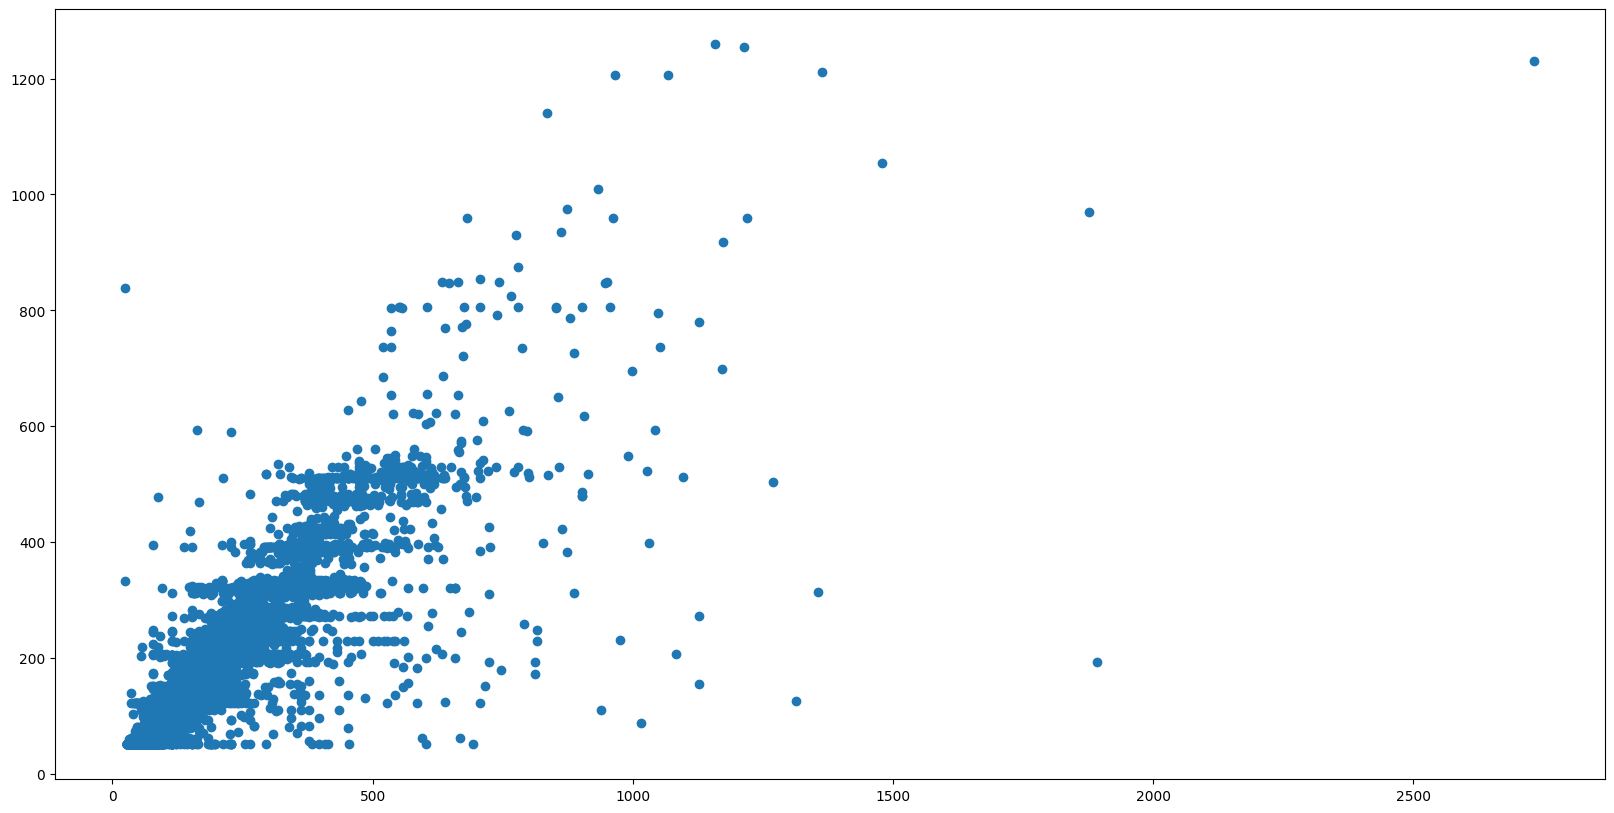

In [113]:
plt.scatter(y_test, pred_3)

C:\Users\User1\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='total_fare', ylabel='Density'>

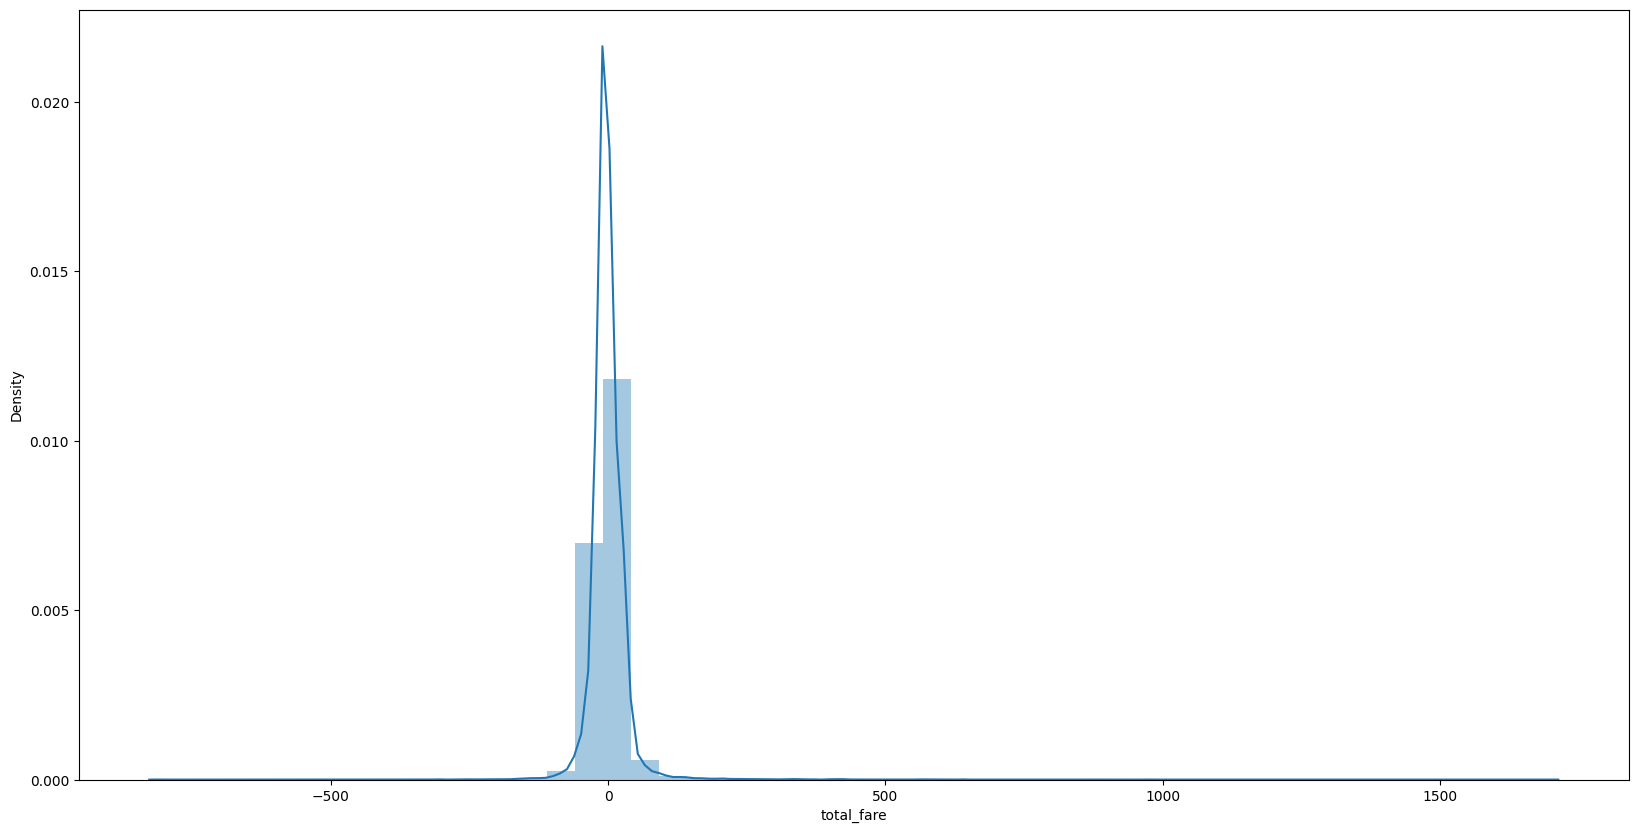

In [114]:
sns.distplot((y_test-pred_3))

In [115]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [116]:
X_train_2 = X_train.sort_values("distance_traveled",ascending = True).astype(int)
X_train_2

,trip_duration,distance_traveled,num_of_passengers
88440,67,0,1
114248,806,0,1
59275,954,0,1
147189,113,0,2
202741,1368,0,1
...,...,...,...
208179,19650,105,2
69442,15749,105,1
146119,4869,106,1
126597,10088,108,1


In [117]:
y_train_2 = y_train.astype(int)
y_train_2

187307    307
59666      58
24845     115
120889    110
124507    112
         ... 
107579    112
95321     139
184973     81
96534      58
84794      97
Name: total_fare, Length: 164631, dtype: int32

In [118]:
X_test_2 = X_test.astype(int)
y_test_2 = y_test.astype(int)
print(X_test_2)
print(y_test_2)

        trip_duration  distance_traveled  num_of_passengers
194432           1016                  4                  2
60013             622                  4                  1
129731           1481                  8                  1
43298             878                  5                  1
46827            1028                  3                  1
...               ...                ...                ...
31244            2137                  6                  1
103228           2338                 12                  1
32695             701                  2                  1
43868             204                  1                  1
136278            557                  5                  1

[41158 rows x 3 columns]
194432    157
60013     126
129731    225
43298     135
46827      99
         ... 
31244     178
103228    293
32695     127
43868      39
136278    118
Name: total_fare, Length: 41158, dtype: int32


In [124]:
from xgboost import XGBRegressor
from sklearn import metrics
model_7 = XGBRegressor(n_estimators=1000 ,learning_rate= 0.01)
model_7.fit(X_train, y_train)
#model_7.score(X_test_2, y_test_2)

score = model_7.score(X_test, y_test)
#pred_7 = model_7.predict(X_test_2)
#accuracy_7 = score(y_test_2, pred_7)
print(score)

0.8191301311663501


In [134]:
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso



# define model
model_8 = Lasso(alpha=1.0)
# define model evaluation method
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
# scores_1 = cross_val_score(model_8, X_train, y_train, scoring='r2_score', cv=cv, n_jobs=-1)
# force scores to be positive

#scores = absolute(scores_1)
#print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

model_8.fit(X_train, y_train)

score1 = model_8.score(X_test, y_test)
score1

0.8001296183786674

In [130]:
from pandas import read_csv
from sklearn.linear_model import Lasso
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
# define model
model = Lasso(alpha=1.0)
# fit model
model.fit(X, y)
# define new data
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
# make a prediction
yhat = model.predict([row])
# summarize prediction
print('Predicted: %.3f' % yhat)

Predicted: 30.998
